<a href="https://colab.research.google.com/github/saptarshimazumdar/deep-learning-concepts/blob/main/feed-forward/activation-functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Question 4**

**Code the Activation Functions**
1. Create a class or set of functions in Python (using numpy) for the following activation functions:
  * Sigmoid: $σ(x) = \frac{1} {1+e^{-x}}$
  * Tanh: $\tanh{x} = \frac{1-e^{-2x}} {1+e^{-2x}}$
  * ReLU: $max(0, x)$
  * Leaky ReLU: x if x > 0, else  αx (use α = 0.01).
2. Implement the derivative for each function.
3. Visualization: Generate a range of inputs from -5 to 5. Plot each activation function and its corresponding derivative on the same graph.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

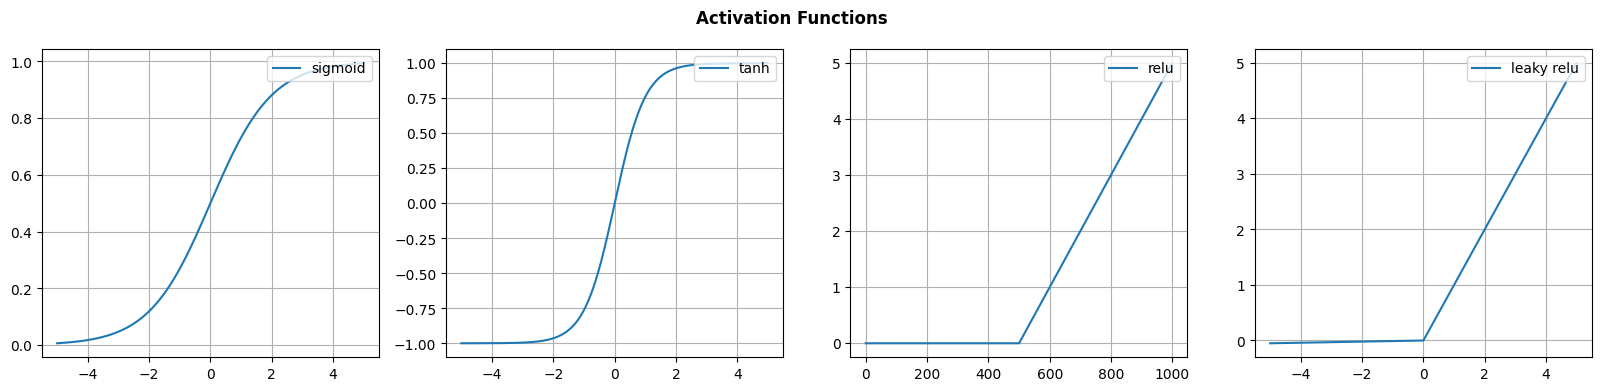

In [38]:
rng = np.random.default_rng()
space = np.arange(-5, 5, 0.01)

class ActivationFunctions:
  def __init__(self, x):
    self.x      = x
    self.alpha  = 0.01

  def sigmoid(self):
    return 1 / (1 + np.exp(-1 * self.x))

  def tanh(self):
    return (1 - np.exp(-2 * self.x)) / (1 + np.exp(-2 * self.x))

  def relu(self):
    return np.maximum(0, self.x)

  def leaky_relu(self):
    return np.maximum(self.alpha * self.x, self.x)

# ----- Plotting -----
L = ActivationFunctions(space)
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

axes[0].plot(space, L.sigmoid(), label='sigmoid')
axes[0].grid()
axes[0].legend(loc='upper right')

axes[1].plot(space, L.tanh(), label='tanh')
axes[1].grid()
axes[1].legend(loc='upper right')

axes[2].plot(L.relu(), label='relu')
axes[2].grid()
axes[2].legend(loc='upper right')

axes[3].plot(space, L.leaky_relu(), label='leaky relu')
axes[3].grid()
axes[3].legend(loc='upper right')

fig.suptitle('Activation Functions', fontweight='bold', fontsize=12)
plt.show()

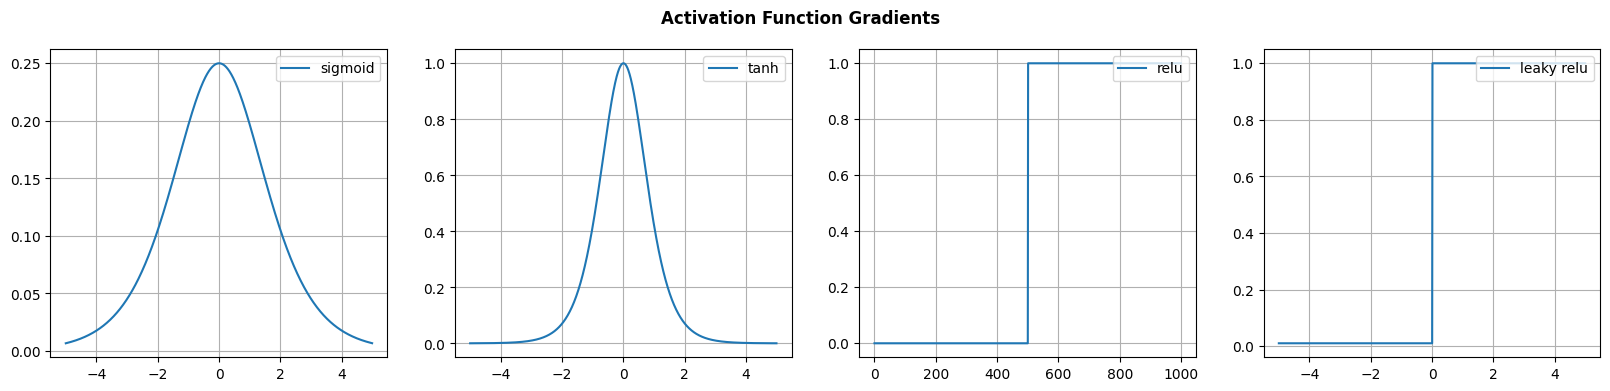

In [39]:
class ActivationFunctionGradients:
  def __init__(self, x):
    self.x      = x
    self.alpha  = 0.01
    self.activation = ActivationFunctions(x)

  def sigmoid(self):
    s = self.activation.sigmoid()
    return s * (1 - s)

  def tanh(self):
    return 1 - np.pow(self.activation.tanh(), 2)

  def relu(self):
    return (self.x > 0).astype(self.x.dtype)

  def leaky_relu(self):
    return self.activation.leaky_relu()/self.x

# ----- Plotting -----
dL = ActivationFunctionGradients(space)
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

axes[0].plot(space, dL.sigmoid(), label='sigmoid')
axes[0].grid()
axes[0].legend(loc='upper right')

axes[1].plot(space, dL.tanh(), label='tanh')
axes[1].grid()
axes[1].legend(loc='upper right')

axes[2].plot(dL.relu(), label='relu')
axes[2].grid()
axes[2].legend(loc='upper right')

axes[3].plot(space, dL.leaky_relu(), label='leaky relu')
axes[3].grid()
axes[3].legend(loc='upper right')

fig.suptitle('Activation Function Gradients', fontweight='bold', fontsize=12)
plt.show()

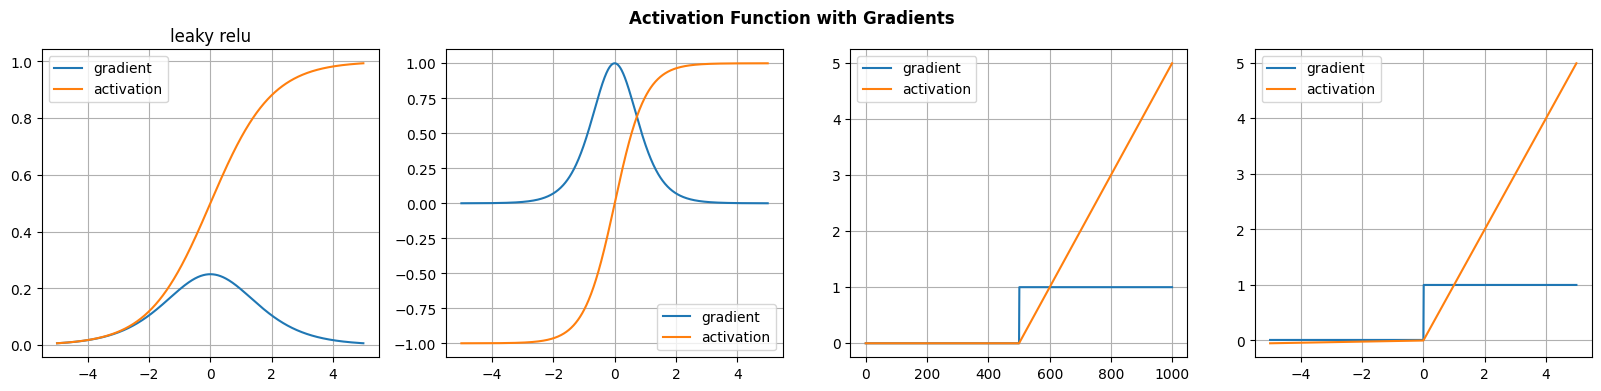

In [49]:
# ----- Master Plotting -----

fig, axes = plt.subplots(1, 4, figsize=(20, 4))

axes[0].plot(space, dL.sigmoid(), label='gradient')
axes[0].plot(space, L.sigmoid(), label='activation')
axes[0].set_title('sigmoid')
axes[0].grid()
axes[0].legend(loc='upper left')

axes[1].plot(space, dL.tanh(), label='gradient')
axes[1].plot(space, L.tanh(), label='activation')
axes[0].set_title('tanh')
axes[1].grid()
axes[1].legend(loc='lower right')

axes[2].plot(dL.relu(), label='gradient')
axes[2].plot(L.relu(), label='activation')
axes[0].set_title('relu')
axes[2].grid()
axes[2].legend(loc='upper left')

axes[3].plot(space, dL.leaky_relu(), label='gradient')
axes[3].plot(space, L.leaky_relu(), label='activation')
axes[0].set_title('leaky relu')
axes[3].grid()
axes[3].legend(loc='upper left')

fig.suptitle('Activation Function with Gradients', fontweight='bold', fontsize=12)
plt.show()